<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Predict_remote_sensor_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning summative assessment - Airline Avionics

## Task 1 Import and clean data

In [ ]:
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.legend import Legend #for legends
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)

In [ ]:
%matplotlib inline

##### Import data

In [ ]:
data_raw = pd.read_csv('ml_summative_raw.csv', sep=',')

In [ ]:
pd.set_option('display.max_columns', None) #make all columns visible
data_raw.head(10)

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,Power Cycle Count,Soft Read Error Rate,smart_15,Current Helium Level,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,"Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count",Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Soft Read Error Rateor,Disk Shift,Loaded Hours,Load/Unload Retry Count,Load Friction,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,77.0,NaN,99.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,74.0,100.0,100.0,95.0,26.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,100.0,113.0,99.0,100.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,222.0,NaN,100.0,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,84.0,NaN,81.0,100.0,NaN,100.0,NaN,NaN,NaN,99.0,100.0,100.0,100.0,81.0,76.0,100.0,100.0,91.0,24.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,88.0,NaN,76.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,72.0,100.0,100.0,85.0,28.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,100.0,NaN,86.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,200.0,126.0,NaN,200.0,200.0,100.0,200.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
5,6,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,85.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,99.0,100.0,100.0,100.0,97.0,68.0,100.0,100.0,75.0,32.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,115.0
6,7,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,88.0,NaN,75.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,75.0,100.0,100.0,92.0,25.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
7,8,2016-01-01,WD-WX41D94RNE4X,WDC WD60EFRX,6001175126016,0,NaN,100.0,100.0,200.0,200.0,NaN,89.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,200.0,126.0,NaN,200.0,200.0,100.0,200.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
8,9,2016-01-01,Z3010AN4,ST4000DM000,4000787030016,0,NaN,98.0,100.0,100.0,87.0,NaN,89.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,69.0,70.0,100.0,100.0,98.0,30.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
9,10,2016-01-01,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,72.0,100.0,100.0,93.0,28.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0


Most of the features are not normally distributed.
Also, there are so many missing values

In [ ]:
#see size of the dataset
data_raw.shape

(75130, 50)

The dataset generally has 75130 rows and 50 columns

In [ ]:
#view information about data
data_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75130 entries, 0 to 75129
Data columns (total 50 columns):
Unnamed: 0                                                                                 75130 non-null int64
date                                                                                       75130 non-null object
serial_number                                                                              75130 non-null object
model                                                                                      75130 non-null object
capacity_bytes                                                                             75130 non-null int64
failure                                                                                    75130 non-null int64
Throughput Performance                                                                     9626 non-null float64
Spin-Up Time                                                                               75128 non-nu

It is obvious from above that there are missing values.

Thankfully, the datatypes of our features are just okay. 
I'll leave the date column datatype as is, and change later if absolutely necessary.

In [ ]:
#see models of drives used
data_raw['model'].unique().tolist()  

['ST4000DM000',
 'HGST HMS5C4040ALE640',
 'WDC WD20EFRX',
 'WDC WD60EFRX',
 'ST320LT007',
 'Hitachi HDS722020ALA330',
 'Hitachi HDS5C3030ALA630',
 'WDC WD30EFRX',
 'ST250LT007',
 'Hitachi HDS5C4040ALE630',
 'Hitachi HDS723030ALA640',
 'ST9250315AS',
 'WDC WD5000LPVX',
 'WDC WD800AAJB',
 'WDC WD3200BEKX',
 'WDC WD1600BPVT',
 'ST4000DX000',
 'ST3160318AS',
 'TOSHIBA DT01ACA300',
 'WDC WD10EADS',
 'WDC WD800JB',
 'WDC WD800LB',
 'WDC WD1600AAJB',
 'WDC WD800BB',
 'WDC WD3200AAJB',
 'WDC WD800JD',
 'ST6000DX000',
 'TOSHIBA MD04ABA500V',
 'WDC WD1600AAJS',
 'WDC WD3200BEKT',
 'ST500LM012 HN',
 'WDC WD10EACS',
 'WDC WD800AAJS',
 'HGST HMS5C4040BLE640',
 'WDC WD5002ABYS',
 'ST3160316AS',
 'ST250LM004 HN',
 'WDC WD40EFRX',
 'ST9320325AS',
 'ST8000DM002',
 'ST31500541AS',
 'WDC WD5000LPCX']

The above shows that there are specific drive models used

In [ ]:
#ensure the integrity of the failure feature
data_raw['failure'].unique().tolist() 

[0, 1]

There are no missing data with the 'failure' record

In [ ]:
data_raw['capacity_bytes'].unique().tolist() #see drive capacities

[4000787030016,
 2000398934016,
 6001175126016,
 320072933376,
 3000592982016,
 250059350016,
 500107862016,
 80026361856,
 160041885696,
 1000204886016,
 -1,
 5000981078016,
 8001563222016,
 1500301910016]

The above shows that there are also specific drive capacities used; but one looks strange

In [ ]:
#view drives by model and capacity
data_raw.groupby(['capacity_bytes', 'model'])['serial_number'].describe()

count unique              top freq
capacity_bytes model                                                      
80026361856    WDC WD800AAJB               65      2  WD-WCAV36480881   60
               WDC WD800AAJS              840     14  WD-WMAV3J935956   60
               WDC WD800BB                300      5  WD-WCAMD1671734   60
               WDC WD800JB                240      4  WD-WMAM9DRJ9680   60
               WDC WD800JD                 60      1  WD-WMAM9DZR3276   60
               WDC WD800LB                 60      1  WD-WCADW2290554   60
160041885696   ST3160316AS                 76      2         9VYC10JY   53
               ST3160318AS                345      6         9VY8VP6C   60
               WDC WD1600AAJB             240      4  WD-WMAV3K823407   60
               WDC WD1600AAJS             356      7  WD-WCAYUEH50142   60
               WDC WD1600BPVT              27      1  WD-WX61E82AXE53   27
250059350016   ST250LM004 HN              137      3   S2T0J9ACB00399   60
               ST250LT007                 218      4         W0Q4QW9E   60
               ST9250315AS                109      3         S2X6CPF9   60
320072933376   ST320LT007                3350     63         W0Q7FR76   60
               ST9320325AS                 60      1         6VDHZK5M   60
               WDC WD3200AAJB              60      1  WD-WCAV2CC97466   60
               WDC WD3200BEKT              59      1  WD-WX71A9290300   59
               WDC WD3200BEKX             112      2  WD-WXA1AA382552   60
500107862016   ST500LM012 HN              431      8   S2ZYJ9CF715318   60
               WDC WD5000LPCX              60      1  WD-WXP1AA589JAJ   60
               WDC WD5000LPVX             281      5  WD-WXE1A25K69JA   60
               WDC WD5002ABYS              60      1  WD-WMASY4167741   60
1000204886016  WDC WD10EACS                 4      1  WD-WCAU42474420    4
               WDC WD10EADS                50      7  WD-WCAU4D819894   18
1500301910016  ST31500541AS                 3      3         6XW029G7    1
2000398934016  Hitachi HDS722020ALA330   1897     43   JK11A8B9J7NWWF   60
               WDC WD20EFRX               138      6  WD-WMC4M2932590   58
3000592982016  Hitachi HDS5C3030ALA630   2028     36   MJ1311YNG2M29A   60
               Hitachi HDS723030ALA640   1303     22   MK0331YHGT1YEA   60
               TOSHIBA DT01ACA300         120      2        13H883WAS   60
               WDC WD30EFRX              1925     37  WD-WMC4N2523398   60
4000787030016  HGST HMS5C4040ALE640      1433     28   PL1331LAGRHDZH   60
               HGST HMS5C4040BLE640      1521     34   PL1331LAHBYPMH   60
               Hitachi HDS5C4040ALE630    697     14   PL1311LAG2E3LH   60
               ST4000DM000              50395    939         Z3029YX1   60
               ST4000DX000               1614     27         Z1Z03FQM   60
               WDC WD40EFRX                60      1  WD-WCC4E0624519   60
5000981078016  TOSHIBA MD04ABA500V         60      1     X4AHK052FMXB   60
6001175126016  ST6000DX000                960     16         Z4D04BH9   60
               WDC WD60EFRX              1394     25  WD-WX21D947N7H5   60
8001563222016  ST8000DM002               1981     48         ZA12PTF2   60

The above data shows that: 
    -There are approximately within just 1500 drives to work with. 
    -The most used model is the ST4000DM000 with a capacity of approximattely 4 Terabytes.
    -The maximum number of times that data about a drive was logged is 60

##### Clean Data

Only one drive shows a capacity of -1, and every other information for this drive is missing. 

In [ ]:
#invesigate the drive associated
data_raw.loc[(data_raw['serial_number']) == 'W300935A']

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,Power Cycle Count,Soft Read Error Rate,smart_15,Current Helium Level,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,"Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count",Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Soft Read Error Rateor,Disk Shift,Loaded Hours,Load/Unload Retry Count,Load Friction,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
9,10,2016-01-01,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,72.0,100.0,100.0,93.0,28.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.000000
217,218,2016-01-02,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,73.0,100.0,100.0,93.0,27.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,118.000000
423,424,2016-01-03,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,73.0,100.0,100.0,93.0,27.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,109.000000
625,626,2016-01-04,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,74.0,100.0,100.0,93.0,26.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,111.000000
830,831,2016-01-05,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,74.0,100.0,100.0,93.0,26.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.000000
1034,1035,2016-01-06,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,74.0,100.0,100.0,93.0,26.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.000000
1236,1237,2016-01-07,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,74.0,100.0,100.0,93.0,26.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.000000
1434,1435,2016-01-08,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,73.0,100.0,100.0,92.0,27.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,115.000000
1635,1636,2016-01-09,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,73.0,100.0,100.0,92.0,27.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,119.000000
1837,1838,2016-01-10,W300935A,ST4000DM000,4000787030016,0,NaN,92.0,100.0,100.0,86.0,NaN,78.0,100.0,NaN,100.0,NaN,NaN,NaN,100.0,100.0,100.0,100.0,99.0,73.0,100.0,100.0,92.0,27.0,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,112.000000


In [ ]:
#remove the row as it has all readings missing

In [ ]:
data_raw.drop([6249], inplace=True)#remove log using index

In [ ]:
#Now investigate for other missing values

In [ ]:
#see count of missing values per column
data_raw.isnull().sum(axis=0) 

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                     65503
Spin-Up Time                                                                                   1
Start/Stop Count                                                                               1
Reallocated Sectors Count                                                                      1
Seek Error Rate               

Unfortunately in this instance, we cannot request business to provide new dataset.
The above again confirms that most importantly, for our predictive feature, there is no missing value.

In [ ]:
#As a general rule, remove all columns where missing data >= 80% of total rows in dataset.

In [ ]:
df = data_raw.copy() #create a new copy of dataframe to work with

,Total,Percent
Current Helium Level,75129,1.000000
Soft Read Error Rate,75129,1.000000
Soft Read Error Rateor,75129,1.000000
smart_15,75129,1.000000
Load Friction,75069,0.999201


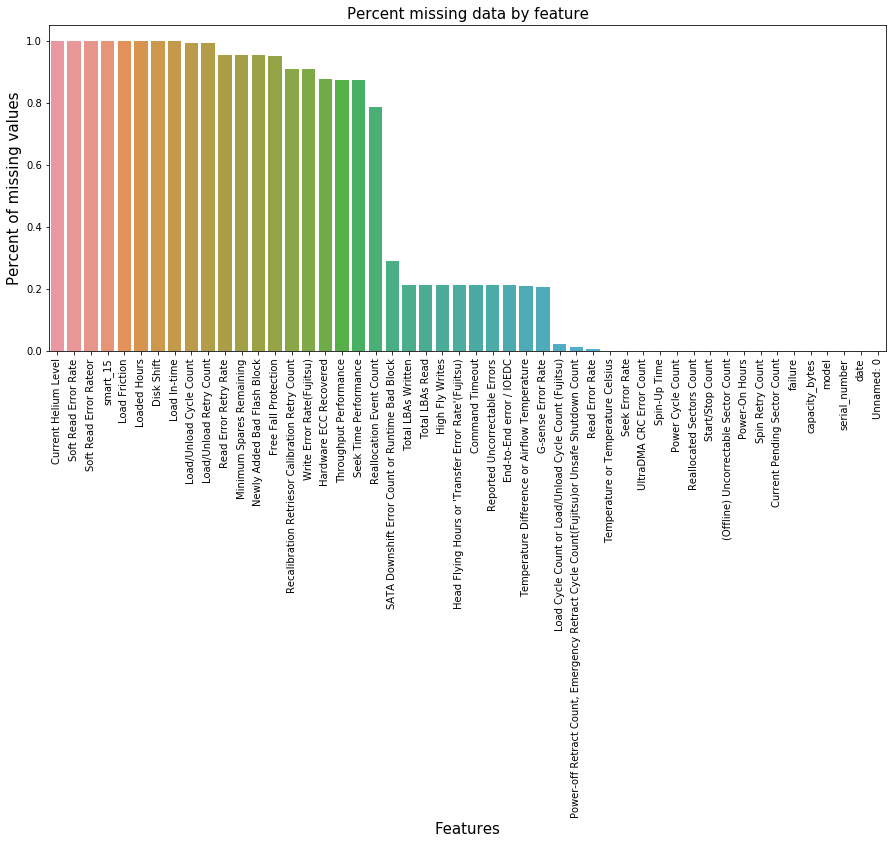

In [ ]:
#compute and see percentage of missing values per column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])

#plot data
f, ax = plt.subplots(figsize = (15, 6))
plt.xticks(rotation = '90')
sns.barplot(x = missing_data.index, y = missing_data['Percent'])
plt.xlabel('Features', size = 15)
plt.ylabel('Percent of missing values', size = 15)
plt.title('Percent missing data by feature', size=15)
missing_data.head()

In [ ]:
#decided threshold is 80%. search for count of missing valuewith that percentage
missing_data.loc[(missing_data['Percent'] > 0.750000) & (missing_data['Percent'] < 0.800000)]

,Total,Percent
Reallocation Event Count,59112,0.786807


In [ ]:
#remove all columns with missing values above the 80% threshold
threshold = 59112 

#select and keep columns with count of missing values lower than 80% threshold
df  = df.loc[:, (df.isnull().sum(axis=0) < threshold)]
df.shape

(75129, 30)

Data column size is now 30 columns

In [ ]:
#view general logs by drive categories
df.sort_values(['model', 'serial_number', 'date'])

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,"Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count",Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Rate
50762,50763,2016-08-17,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,250.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
50991,50992,2016-08-18,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,250.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
51219,51220,2016-08-19,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,250.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
51446,51447,2016-08-20,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,253.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
51678,51679,2016-08-21,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,250.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
51908,51909,2016-08-22,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,250.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
52137,52138,2016-08-23,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,253.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
52368,52369,2016-08-24,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,253.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
52605,52606,2016-08-25,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,253.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000
52842,52843,2016-08-26,PL1331LAGRGELH,HGST HMS5C4040ALE640,4000787030016,0,128.0,100.0,100.0,100.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,253.0,100.0,100.0,200.0,NaN,NaN,NaN,100.000000


Some features seem to have a lot of missing values for 1 drive.
Investigate this further

In [ ]:
#see how many times each drive was logged
df['serial_number'].value_counts()

Z3029YX1           60
Z304JFD7           60
Z3051TPF           60
Z300GPPN           60
PL1321LAG2DHGH     60
Z3011WXM           60
Z305DW3P           60
Z300GZE3           60
Z3029F0E           60
Z300XFQH           60
Z300TXBY           60
Z303C1RC           60
W0Q6KYJX           60
Z304KBPH           60
MK0333YHGPEH1C     60
Z305D4QW           60
S300X96S           60
Z3029GF0           60
Z3025LKN           60
W300T1YZ           60
WD-WMC4N0D8KTAY    60
Z302F0C2           60
Z300GZDQ           60
S300Z3R1           60
Z3058MVP           60
MK0301YHGNSV8D     60
PL2331LAGN0WBJ     60
Z3019HDN           60
Z300NK8E           60
W300CWLM           60
                   ..
S3000A9T            2
Z3049EGT            2
Z303VKE9            2
Z303KH9F            2
PL1301LAG3594H      2
Z305D5V8            2
Z305NDX3            2
Z3055R6G            2
Z302A14M            2
Z300WF3E            2
Z3025LCN            2
S301146W            2
WD-WCAU45402975     1
W3006E5B            1
WD-WCC4N3N

In [ ]:
#start with easiest pattern and drop features having missing values of 100% for a drive

In [ ]:
df.groupby(['serial_number']).apply(lambda x: x.isnull().sum())

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,"Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count",Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13H883WAS,0,0,0,0,0,0,0,0,0,0,0,0,0,60,60,60,60,60,60,60,0,0,0,0,0,0,60,60,60,0
5VML01P0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,60,60,0,0,0,0,0,0,0,0
6VDHZK5M,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,60,60,60,0
6VMX70TB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,23,0,0,0,0,0,0,0,0
6VY16NA1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,47,47,0,0,0,0,0,0,0,0
6XW00MWE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
6XW029G7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
6XW057CW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
9VMHY7KX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,60,60,0,0,0,0,0,0,0,0


In [ ]:
#drop all columns showing 60 in above analysis as percentage of data not enough to train model
"""
'SATA Downshift Error Count or Runtime Bad Block'
'End-to-End error / IOEDC' 
'Reported Uncorrectable Errors' 
'Command Timeout' 
'High Fly Writes' 
'Temperature Difference or Airflow Temperature'
'G-sense Error Rate'
'Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count' 
'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)'
"Head Flying Hours or 'Transfer Error Rate'(Fujitsu)"
'Total LBAs Written' 
'Total LBAs Read'
"""

#use indexes because of errors in using names
new_data = df.drop(df.columns[[13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28]], axis=1)

In [ ]:
new_data.shape

(75129, 18)

There are now 18 columns to work with

In [ ]:
#Now start filling missing values

In [ ]:
new_data #view dataframe

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,96.0,100.0,100.0,77.0,99.0,100.0,100.0,26.0,100.0,100.0,200.0,114.000000
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,138.0,100.0,100.0,100.0,99.0,100.0,100.0,222.0,100.0,100.0,200.0,100.000000
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,91.0,100.0,100.0,84.0,81.0,100.0,100.0,24.0,100.0,100.0,200.0,120.000000
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,91.0,100.0,100.0,88.0,76.0,100.0,100.0,28.0,100.0,100.0,200.0,117.000000
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,100.0,100.0,200.0,100.0,86.0,100.0,100.0,126.0,200.0,100.0,200.0,200.000000
5,6,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,91.0,100.0,100.0,85.0,78.0,100.0,100.0,32.0,100.0,100.0,200.0,115.000000
6,7,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,92.0,100.0,100.0,88.0,75.0,100.0,100.0,25.0,100.0,100.0,200.0,117.000000
7,8,2016-01-01,WD-WX41D94RNE4X,WDC WD60EFRX,6001175126016,0,100.0,100.0,200.0,200.0,89.0,100.0,100.0,126.0,200.0,100.0,200.0,200.000000
8,9,2016-01-01,Z3010AN4,ST4000DM000,4000787030016,0,98.0,100.0,100.0,87.0,89.0,100.0,100.0,30.0,100.0,100.0,200.0,117.000000
9,10,2016-01-01,W300935A,ST4000DM000,4000787030016,0,92.0,100.0,100.0,86.0,78.0,100.0,100.0,28.0,100.0,100.0,200.0,117.000000


There are new 75129 columns and 18 rows

In [ ]:
#view missing values by serial number again
pd.set_option('display.max_rows', None) #see all rows
new_data.groupby(['serial_number']).apply(lambda x: x.isnull().sum())

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,
13H883WAS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5VML01P0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6VDHZK5M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6VMX70TB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6VY16NA1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6XW00MWE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6XW029G7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6XW057CW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9VMHY7KX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.reset_option #reset pandas to truncate rows & columns

In [ ]:
#check to see if there are still any missing data
sum(new_data.isnull().any())

12

There are missing values in 12 of the 18 columns

In [ ]:
#see summary of missing values by column 
new_data.isnull().sum(axis=0) 

Unnamed: 0                                0
date                                      0
serial_number                             0
model                                     0
capacity_bytes                            0
failure                                   0
Spin-Up Time                              1
Start/Stop Count                          1
Reallocated Sectors Count                 1
Seek Error Rate                           1
Power-On Hours                            1
Spin Retry Count                          1
Power Cycle Count                         1
Temperature or Temperature Celsius       61
Current Pending Sector Count              1
(Offline) Uncorrectable Sector Count      1
UltraDMA CRC Error Count                  1
Read Error Rate                         597
dtype: int64

In [ ]:
#save where missing values appear into variable for deeper analysis
still_missing = new_data[new_data.isna().any(axis=1)]
still_missing

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate
42683,42684,2016-07-11,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
42896,42897,2016-07-12,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
43106,43107,2016-07-13,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
43317,43318,2016-07-14,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
43524,43525,2016-07-15,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
43728,43729,2016-07-16,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
43932,43933,2016-07-17,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
44136,44137,2016-07-18,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
44343,44344,2016-07-19,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0
44551,44552,2016-07-20,WD-WCAV3D509504,WDC WD1600AAJS,160041885696,0,138.0,100.0,200.0,100.0,43.0,100.0,100.0,NaN,200.0,200.0,200.0,200.0


In [ ]:
#see count of missing values in each feature for each drive, and affected feature
still_missing.groupby(['serial_number']).apply(lambda x: x.isnull().sum())

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,
9VYC10JY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51
PL1331LAHD0JSH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39
PL2331LAGN2KJJ,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
S2ZYJ9GF302353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49
W3015JSX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32
W301D5NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35
WD-WCAU45692971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
WD-WCAU4D819894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
WD-WCAV3D509504,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0


It has already been earlier established that maximum count of each drive is 60.
Thus, delete records of drive still missing >60% data on any column.

In [ ]:
#See the list of drives involved
still_missing['serial_number'].unique().tolist()

['WD-WCAV3D509504',
 'WD-WCAU45692971',
 'WD-WMAYV3001446',
 '9VYC10JY',
 'WD-WXU1E83UUNF8',
 'Z303Z6S1',
 'Z304EZL5',
 'Z302BMWF',
 'Z3029ZHR',
 'Z3041LKP',
 'S2ZYJ9GF302353',
 'Z302EPA7',
 'WD-WCAU4D819894',
 'PL1331LAHD0JSH',
 'W301D5NF',
 'W3015JSX',
 'PL2331LAGN2KJJ']

They are very few compared with the total number of drives

In [ ]:
#Start with Read ErrorRate column

In [ ]:
new_data = new_data.loc[new_data.groupby('serial_number')['Read Error Rate'].filter(lambda x: len(x[pd.isnull(x)] ) < 38).index]
new_data.shape

(74607, 18)

In [ ]:
#see new summary of missing values by column 
new_data.isnull().sum(axis=0) 

Unnamed: 0                                0
date                                      0
serial_number                             0
model                                     0
capacity_bytes                            0
failure                                   0
Spin-Up Time                              1
Start/Stop Count                          1
Reallocated Sectors Count                 1
Seek Error Rate                           1
Power-On Hours                            1
Spin Retry Count                          1
Power Cycle Count                         1
Temperature or Temperature Celsius       61
Current Pending Sector Count              1
(Offline) Uncorrectable Sector Count      1
UltraDMA CRC Error Count                  1
Read Error Rate                         119
dtype: int64

In [ ]:
"""
fill missing rows in remaining columns by filling them with preceding and succeeding values
based on the specific drives(using their serial numbers) and dates of record
"""
new_data = (new_data.sort_values(['serial_number', 'date'])).fillna(method='ffill').fillna(method='bfill')#combine forward and backward fill

#see new summary of missing values by column 
new_data.isnull().sum(axis=0)

Unnamed: 0                              0
date                                    0
serial_number                           0
model                                   0
capacity_bytes                          0
failure                                 0
Spin-Up Time                            0
Start/Stop Count                        0
Reallocated Sectors Count               0
Seek Error Rate                         0
Power-On Hours                          0
Spin Retry Count                        0
Power Cycle Count                       0
Temperature or Temperature Celsius      0
Current Pending Sector Count            0
(Offline) Uncorrectable Sector Count    0
UltraDMA CRC Error Count                0
Read Error Rate                         0
dtype: int64

In [ ]:
new_data = new_data.sort_values(['Unnamed: 0']) #resort values using 'Unnamed' column to restore original sorting order
new_data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,96.0,100.0,100.0,77.0,99.0,100.0,100.0,26.0,100.0,100.0,200.0,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,138.0,100.0,100.0,100.0,99.0,100.0,100.0,222.0,100.0,100.0,200.0,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,91.0,100.0,100.0,84.0,81.0,100.0,100.0,24.0,100.0,100.0,200.0,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,91.0,100.0,100.0,88.0,76.0,100.0,100.0,28.0,100.0,100.0,200.0,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,100.0,100.0,200.0,100.0,86.0,100.0,100.0,126.0,200.0,100.0,200.0,200.0


In [ ]:
sum(new_data.isnull().any()) #check if there are still any missing values

0

## Task 2 Inspect and visualize the data

Text(0.5, 0, 'Disk Model')

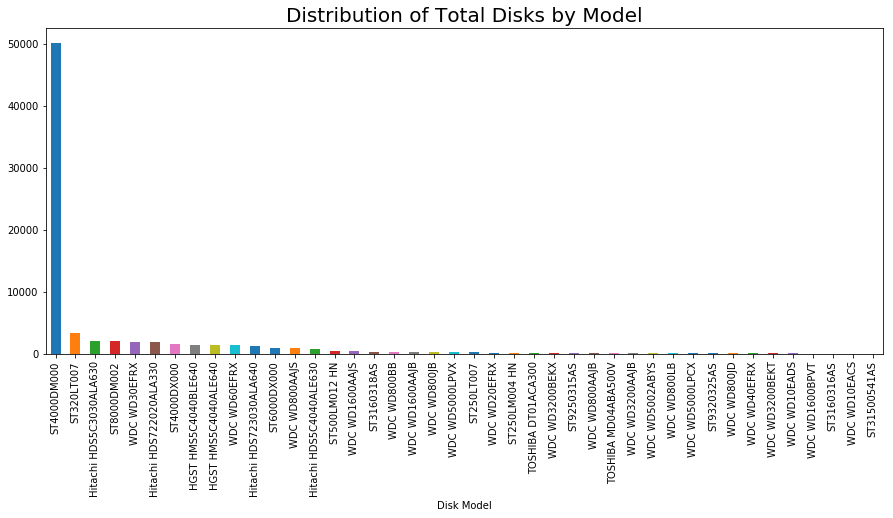

In [ ]:
#Start by visualising distribution of disks by model
fig = plt.figure(figsize=(15, 6))
new_data['model'].value_counts().plot(kind='bar')
plt.title('Distribution of Total Disks by Model', size = 20)
plt.xlabel('Disk Model')

## Task 3 Feature engineering

In [ ]:
#Investigate instances of fail in Drives

In [ ]:
#I'll now be investigating the drives;
#Let's see which drives failed, and which didn't; and the nature of these data

In [ ]:
test = new_data.copy() #create a new copy of dataframe

In [ ]:
#see which drives failed. since failure is recorded only once, no need for complex code
failed = test.loc[test['failure'] == 1]
failed['serial_number']

100      WD-WCC4MKDL77ZK
105             Z300KHN0
124             Z3015V4D
163             W3006E5B
238             S301146W
252             Z3025LCN
263       PL1301LAG3594H
286             Z300GPY9
342             Z302A14M
403             Z300WF3E
433      WD-WCC4M3TTXF1Y
474             Z30054Q5
537             Z3025K64
603       JK1105B8GHLUBX
685       JK11A8B9HTY23F
742             Z304JD7V
762             S3007K7N
833      WD-WX11D84JN1EP
852       JK1105B8GA6AYX
879       JK11A8B9J388ZF
955      WD-WCAV39016131
1045            Z3015CR3
1053            Z300X7EZ
1075            W300BSKD
1131            Z300WGAW
1165            W300C8F6
1207            Z303RK24
1208            Z300GZ1N
1297            Z304HT8H
1309      MJ1311YNG3AUYA
              ...       
74780           Z30250NN
74793           Z300GZ6V
74833           ZA13WDTQ
74863           Z300GQDM
74886           W3009Q81
74911     MK0333YHGNY76C
74928     S2ZYJ9AFA09520
74929           Z300LFYC
74935           Z3026Z8K


In [ ]:
#create a new feature in dataset such that if a drive failed at any time within the 12 months, it is True, else False
test['status'] = test['serial_number'].isin(failed['serial_number'])
test[['status']].head()

,status
0,True
1,True
2,True
3,True
4,True


In [ ]:
#Encode Status. 1= True / 0 = False
test['status_encoded'] = np.where((test['status']==True), 1, 0)
test[['status_encoded']].head()

,status_encoded
0,1
1,1
2,1
3,1
4,1


In [ ]:
#get all instances for drives that did not fail
healthy_drives = test.loc[(test['status'])==False]
healthy_drives

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate,status
46362,46363,2016-07-28,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,165.0,100.0,200.0,100.0,22.0,100.0,100.0,120.0,200.0,200.0,200.0,175.665715,False
46583,46584,2016-07-29,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,165.0,100.0,200.0,100.0,22.0,100.0,100.0,120.0,200.0,200.0,200.0,175.665715,False
46806,46807,2016-07-30,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,165.0,100.0,200.0,100.0,22.0,100.0,100.0,121.0,200.0,200.0,200.0,175.665715,False
47030,47031,2016-07-31,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,165.0,100.0,200.0,200.0,22.0,100.0,100.0,121.0,200.0,200.0,200.0,175.665715,False
47253,47254,2016-08-01,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,165.0,100.0,200.0,200.0,22.0,100.0,100.0,122.0,200.0,200.0,200.0,175.665715,False
48573,48574,2016-08-07,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,160.0,100.0,200.0,100.0,22.0,100.0,100.0,117.0,200.0,200.0,200.0,175.665715,False
48798,48799,2016-08-08,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,160.0,100.0,200.0,100.0,22.0,100.0,100.0,117.0,200.0,200.0,200.0,175.665715,False
49023,49024,2016-08-09,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,160.0,100.0,200.0,100.0,22.0,100.0,100.0,116.0,200.0,200.0,200.0,200.000000,False
49694,49695,2016-08-12,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,161.0,100.0,200.0,100.0,22.0,100.0,100.0,124.0,200.0,200.0,200.0,200.000000,False
49924,49925,2016-08-13,WD-WCAU45692971,WDC WD10EADS,1000204886016,0,161.0,100.0,200.0,100.0,22.0,100.0,100.0,123.0,200.0,200.0,200.0,200.000000,False


From the above, the first instance of the first appearing healthy drive was from the 28th of July 2016. Thus, train_test_split should be done more carefully, and certainly should not be done by date. Although not typical for a Time Series data, train_test_split for my model would be done more intentionally

In [ ]:
healthy_drives['serial_number'].value_counts()

Z300GYMW           58
Z304KBY0           58
WD-WMC4N2816989    58
ZA12PTR5           58
S300Z3ZL           57
Z300ZR58           55
Z300ZV0C           54
MJ0351YNGA62NA     54
ZA10QN09           54
Z1Z03G2H           54
Z302A0Z1           54
W300D55C           54
Z3014A8C           54
Z30111PC           53
Z305D4X6           53
ZA10Q2F7           53
S301LJ5G           53
W301D5NF           38
W3015JSX           35
WD-WMAYV3001446    25
WD-WCAU4D819894    18
WD-WCAU45692971    12
WD-WCC4N3NZ451J     1
Name: serial_number, dtype: int64

In [ ]:
#plot comparison of drives that failed to drives that did not fail

In [ ]:
#get the total number of drives into a variable
total_drives = new_data['serial_number'].unique().tolist()
total_drives = pd.DataFrame(total_drives, columns = ['serial_number']) #save to dataframe

In [ ]:
total_drives.count()

serial_number    1420
dtype: int64

Text(0.5, 0, 'Drive Status')

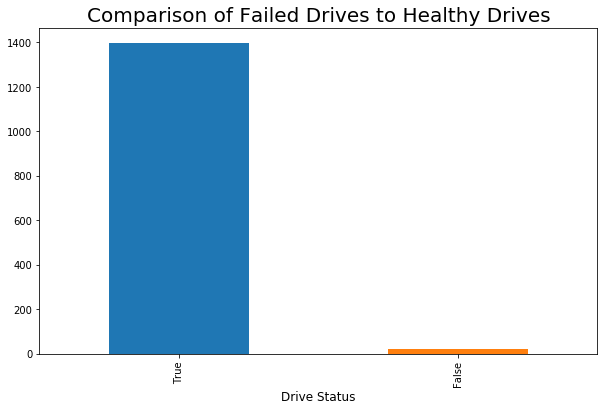

In [ ]:
#store comparison data using both dataframes to know which drives failed
comparison = total_drives['serial_number'].isin(failed['serial_number'])#check if drive in list of drives that failed?

#plot 
fig = plt.figure(figsize=(10, 6))
comparison.value_counts().plot(kind='bar')
plt.title('Comparison of Failed Drives to Healthy Drives', size = 20)
plt.xlabel('Drive Status', size = 12)

A large majority of the drives failed over the given period.

## Task 4 Model fitting

In [ ]:
ml_RFC = test.copy() #create a new copy of dataframe

In [ ]:
ml_RFC.drop(ml_RFC.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

In [ ]:
ml_RFC.shape

(74607, 15)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##### encode categorical variable variables

In [ ]:
#le = preprocessing.LabelEncoder()#set label encoder

#encode categorical variables
for col in ml_RFC.columns.values:
    if ml_RFC[col].dtypes=='object':
        data = ml_RFC[col]
        le.fit(data.values)
        ml_RFC[col] = le.transform(ml_RFC[col])

In [ ]:
#save encoder
#filename = 'label_encoder.sav'
#pickle.dump(le, open(filename, 'wb'))

In [ ]:
ml_RFC.head()

,failure,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Power Cycle Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Read Error Rate,status,status_encoded
0,0,96.0,100.0,100.0,77.0,99.0,100.0,100.0,26.0,100.0,100.0,200.0,114.0,True,1
1,0,138.0,100.0,100.0,100.0,99.0,100.0,100.0,222.0,100.0,100.0,200.0,100.0,True,1
2,0,91.0,100.0,100.0,84.0,81.0,100.0,100.0,24.0,100.0,100.0,200.0,120.0,True,1
3,0,91.0,100.0,100.0,88.0,76.0,100.0,100.0,28.0,100.0,100.0,200.0,117.0,True,1
4,0,100.0,100.0,200.0,100.0,86.0,100.0,100.0,126.0,200.0,100.0,200.0,200.0,True,1


In [ ]:
X_data = ml_RFC.drop(ml_RFC.columns[[0, 13, 14]], axis=1)#drop predictor columns

X = X_data.values #and save other features values into a matrix
y = ml_RFC['status_encoded'].values

In [ ]:
#confirm that no missing value issues with X
np.isnan(X).any() #check array for missing values

False

###### Train test split

In [ ]:
#split data in such a way that failed and healthy drives are properly distributed

In [ ]:
#split test and train, and stratify using drive status; whether failed, or still healthy
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [ ]:
#perform scaler normalization
mms = preprocessing.MinMaxScaler()  
X_train = mms.fit_transform(X_train)  
X_test = mms.transform(X_test) 

##### Models

###### Perform Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train) # fit model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##### feature importance

In [ ]:
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_data.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Power-On Hours,0.238896
Temperature or Temperature Celsius,0.213186
Spin-Up Time,0.211215
Read Error Rate,0.181453
Seek Error Rate,0.147419
Reallocated Sectors Count,0.004137
(Offline) Uncorrectable Sector Count,0.002864
Current Pending Sector Count,0.000648
Spin Retry Count,0.000138
Start/Stop Count,0.000044


The 'UltraDMA CRC Error Count' had zero effect on model

In [ ]:
predict1 = forest.predict(X_test) #predict test set

In [ ]:
predict1 #view predictions

array([1, 1, 1, ..., 1, 1, 1])

##### Retrain Random Forest; drop columns with no effect

In [ ]:
#drop predictor columns and columns wth minimal effect
X_data2 = ml_RFC.drop(ml_RFC.columns[[0, 2, 7, 11, 13, 14]], axis=1)#drop predictor columns

X_2 = X_data2.values #and save other features values into a matrix
y_2 = ml_RFC['status_encoded'].values

In [ ]:
X_data2.head(3)

,Spin-Up Time,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,Read Error Rate
0,96.0,100.0,77.0,99.0,100.0,26.0,100.0,100.0,114.0
1,138.0,100.0,100.0,99.0,100.0,222.0,100.0,100.0,100.0
2,91.0,100.0,84.0,81.0,100.0,24.0,100.0,100.0,120.0


In [ ]:
#split test and train, and stratify using drive status; whether failed, or still healthy
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, stratify=y_2, test_size=0.3)

In [ ]:
#perform scaler normalization
mms = preprocessing.MinMaxScaler()  
X_train2 = mms.fit_transform(X_train2)  
X_test2 = mms.transform(X_test2) 

In [ ]:
forest2 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest2.fit(X_train2, y_train2) #fit model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
predict2 = forest2.predict(X_test2) ##predict test set

In [ ]:
predict2 #view predictions

array([1, 1, 1, ..., 1, 1, 1])

##### Neural Network

In [ ]:
#import the MLP Classifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Creating the neural network
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000)
mlp.fit(X_train2,y_train2)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
predictions = mlp.predict(X_test2)#predict test set

In [ ]:
predictions #view predictions

array([1, 1, 1, ..., 1, 1, 1])

The visible predictions from all the predictions are the same

##### Finalise models

In [ ]:
#Random Forest

In [ ]:
forest_final = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest_final.fit(X_2, y_2) # fit model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
#Neural Networks

In [ ]:
#train the neural network
mlp_final = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000)
mlp_final.fit(X_2,y_2)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
#save final model

In [ ]:
#filename = 'MLP_model.sav'
#pickle.dump(mlp_final, open(filename, 'wb'))

## Task 5 Model evaluation

In [ ]:
from sklearn import metrics

##### Evaluate First Random Forest Classifier

In [ ]:
forest.score(X_train, y_train)

0.9977022058823529

In [ ]:
forest.score(X_test, y_test)

0.993030424876022

In [ ]:
# F-measure
metrics.f1_score(y_test, predict1, average='micro')

0.993030424876022

In [ ]:
# The confusion matrix gives a better picture of what errors are slipping in
print(metrics.confusion_matrix(y_test,predict1))
print(metrics.classification_report(y_test,predict1))

[[  210   109]
 [   47 22017]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       319
           1       1.00      1.00      1.00     22064

   micro avg       0.99      0.99      0.99     22383
   macro avg       0.91      0.83      0.86     22383
weighted avg       0.99      0.99      0.99     22383



##### Evaluate Second Random Forest Classifier

In [ ]:
forest2.score(X_train2, y_train2)

0.9975107230392157

In [ ]:
forest2.score(X_test2, y_test2)

0.993209131930483

In [ ]:
# The confusion matrix gives a better picture of what errors are slipping in
print(metrics.confusion_matrix(y_test2,predict2))
print(metrics.classification_report(y_test2,predict2))

[[  222    97]
 [   55 22009]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       319
           1       1.00      1.00      1.00     22064

   micro avg       0.99      0.99      0.99     22383
   macro avg       0.90      0.85      0.87     22383
weighted avg       0.99      0.99      0.99     22383



##### Evaluate Neural Network

In [ ]:
print(mlp.score(X_train2, y_train2))

0.986538756127451


In [ ]:
# The score - pretty good! ~96% accuracy (will vary depending on the random weights the model started with)
print(mlp.score(X_test2, y_test2))
# The confusion matrix gives a better picture of what errors are slipping in
print(metrics.confusion_matrix(y_test2,predictions))
print(metrics.classification_report(y_test2,predictions))

0.9865969709154269
[[   26   293]
 [    7 22057]]
              precision    recall  f1-score   support

           0       0.79      0.08      0.15       319
           1       0.99      1.00      0.99     22064

   micro avg       0.99      0.99      0.99     22383
   macro avg       0.89      0.54      0.57     22383
weighted avg       0.98      0.99      0.98     22383



All Train scores are close to test scores. I do not think there is a problem of overfitting

## Task 6 Produce recommendations

In [ ]:
#On dealing with this data, use same methods as applied in model training

In [ ]:
unseen_data = pd.read_csv('ml_summative_predict.csv', sep=';')
pd.set_option('display.max_columns', None) #make all columns visible
unseen_data.head(10)

,Unnamed: 0,date,serial_number,model,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,Power Cycle Count,Soft Read Error Rate,smart_15,Current Helium Level,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,"Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count",Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Soft Read Error Rateor,Disk Shift,Loaded Hours,Load/Unload Retry Count,Load Friction,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-12-25,W3015JSX,ST4000DM000,"4,00079E+12",NaN,92,100,100,75,NaN,99,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2,2016-12-25,ZA10Q2F7,ST8000DM002,"8,00156E+12",NaN,96,100,100,86,NaN,95,100,NaN,100,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,69.0,100.0,100.0,100.0,31,1.0,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,70
2,3,2016-12-25,9VYC10JY,ST3160316AS,"1,60042E+11",NaN,97,100,100,87,NaN,46,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,75.0,NaN,NaN,NaN,25,61.0,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
3,4,2016-12-25,Z304KBY0,ST4000DM000,"4,00079E+12",NaN,94,100,100,87,NaN,88,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,74.0,100.0,100.0,98.0,26,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,"15,59842504"
4,5,2016-12-25,WD-WXU1E83UUNF8,WDC WD5000LPVX,"5,00108E+11",NaN,152,100,200,200,NaN,68,100,100.0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,115.0,113,NaN,200.0,200,100,200,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2016-12-25,WD-WMC4N2816989,WDC WD30EFRX,"3,00059E+12",NaN,181,100,200,100,NaN,74,100,100.0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,200.0,125,NaN,200.0,200,100,200,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45,99184414"
6,7,2016-12-25,Z30111PC,ST4000DM000,"4,00079E+12",NaN,91,100,100,80,NaN,72,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,96.0,73.0,100.0,100.0,13.0,27,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,118
7,8,2016-12-25,Z303Z6S1,ST4000DM000,"4,00079E+12",NaN,96,100,100,77,NaN,99,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,77.0,100.0,100.0,99.0,23,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
8,9,2016-12-25,Z304EZL5,ST4000DM000,"4,00079E+12",NaN,92,100,100,78,NaN,98,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,78.0,100.0,100.0,100.0,22,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
9,10,2016-12-25,W301D5NF,ST4000DM000,"4,00079E+12",NaN,92,100,100,75,NaN,99,100,NaN,100,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,68.0,100.0,100.0,100.0,32,NaN,NaN,100,100,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#keep majorly features used in second Random Forest model

In [ ]:
X_data2.columns #view features used for training second random forest and neural network

Index(['Spin-Up Time', 'Reallocated Sectors Count', 'Seek Error Rate',
       'Power-On Hours', 'Spin Retry Count',
       'Temperature or Temperature Celsius', 'Current Pending Sector Count',
       '(Offline) Uncorrectable Sector Count', 'Read Error Rate'],
      dtype='object')

In [ ]:
predict_data = unseen_data.iloc[:, [0, 1, 2, 6, 8, 9, 11, 12, 27, 30, 31, 48]] #select columns to work with

In [ ]:
predict_data #view data

,Unnamed: 0,date,serial_number,Spin-Up Time,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,Read Error Rate
0,1,2016-12-25,W3015JSX,92,100,75,99,100,32,100,100,NaN
1,2,2016-12-25,ZA10Q2F7,96,100,86,95,100,31,100,100,70
2,3,2016-12-25,9VYC10JY,97,100,87,46,100,25,100,100,NaN
3,4,2016-12-25,Z304KBY0,94,100,87,88,100,26,100,100,"15,59842504"
4,5,2016-12-25,WD-WXU1E83UUNF8,152,200,200,68,100,113,200,100,NaN
5,6,2016-12-25,WD-WMC4N2816989,181,200,100,74,100,125,200,100,"45,99184414"
6,7,2016-12-25,Z30111PC,91,100,80,72,100,27,100,100,118
7,8,2016-12-25,Z303Z6S1,96,100,77,99,100,23,100,100,NaN
8,9,2016-12-25,Z304EZL5,92,100,78,98,100,22,100,100,NaN
9,10,2016-12-25,W301D5NF,92,100,75,99,100,32,100,100,NaN


In [ ]:
predict_data.dtypes #view datatypes

Unnamed: 0                               int64
date                                    object
serial_number                           object
Spin-Up Time                             int64
Reallocated Sectors Count                int64
Seek Error Rate                          int64
Power-On Hours                           int64
Spin Retry Count                         int64
Temperature or Temperature Celsius       int64
Current Pending Sector Count             int64
(Offline) Uncorrectable Sector Count     int64
Read Error Rate                         object
dtype: object

In [ ]:
#convert Read Error Rate to numeric
predict_data['Read Error Rate'] = pd.to_numeric(predict_data['Read Error Rate'], errors='coerce')

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
#next, convert all integers,except 'Unnamed: 0'  to floats, to match data used in model

In [ ]:
#set columns to have sae datatypes as used in model training
float_col = predict_data.select_dtypes(include = ['int64']) #select int columns only

#convert all int columns to float
for col in float_col.columns.values:
     predict_data[col] = predict_data[col].astype('float64')

In [ ]:
#convert 'Unnamed: 0' back to numeric
predict_data['Unnamed: 0'] = predict_data['Unnamed: 0'].astype('int64')

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
predict_data.dtypes #view datatypes

Unnamed: 0                                int64
date                                     object
serial_number                            object
Spin-Up Time                            float64
Reallocated Sectors Count               float64
Seek Error Rate                         float64
Power-On Hours                          float64
Spin Retry Count                        float64
Temperature or Temperature Celsius      float64
Current Pending Sector Count            float64
(Offline) Uncorrectable Sector Count    float64
Read Error Rate                         float64
dtype: object

In [ ]:
#see new summary of missing values by column 
predict_data.isnull().sum(axis=0)

Unnamed: 0                                0
date                                      0
serial_number                             0
Spin-Up Time                              0
Reallocated Sectors Count                 0
Seek Error Rate                           0
Power-On Hours                            0
Spin Retry Count                          0
Temperature or Temperature Celsius        0
Current Pending Sector Count              0
(Offline) Uncorrectable Sector Count      0
Read Error Rate                         103
dtype: int64

Only the Read Error Rate column has missing values

In [ ]:
#deeper analysis by drive categories
predict_data.sort_values(['serial_number', 'date'])

,Unnamed: 0,date,serial_number,Spin-Up Time,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,Read Error Rate
2,3,2016-12-25,9VYC10JY,97.0,100.0,87.0,46.0,100.0,25.0,100.0,100.0,NaN
32,33,2016-12-26,9VYC10JY,97.0,100.0,87.0,46.0,100.0,24.0,100.0,100.0,NaN
62,63,2016-12-27,9VYC10JY,97.0,100.0,87.0,46.0,100.0,24.0,100.0,100.0,99.0
87,88,2016-12-28,9VYC10JY,97.0,100.0,87.0,46.0,100.0,26.0,100.0,100.0,NaN
112,113,2016-12-29,9VYC10JY,97.0,100.0,87.0,46.0,100.0,26.0,100.0,100.0,NaN
136,137,2016-12-30,9VYC10JY,97.0,100.0,87.0,46.0,100.0,27.0,100.0,100.0,NaN
159,160,2016-12-31,9VYC10JY,97.0,100.0,87.0,46.0,100.0,27.0,100.0,100.0,NaN
21,22,2016-12-25,MJ0351YNGA62NA,126.0,100.0,100.0,95.0,100.0,230.0,100.0,100.0,85.0
51,52,2016-12-26,MJ0351YNGA62NA,126.0,100.0,100.0,95.0,100.0,206.0,100.0,100.0,83.0
77,78,2016-12-27,MJ0351YNGA62NA,126.0,100.0,100.0,95.0,100.0,214.0,100.0,100.0,80.0


In [ ]:
"""
fill missing rows in remaining columns by filling them with preceding and succeeding values
based on the specific drives(using their serial numbers) and dates of record
"""
predict_data = (predict_data.sort_values(['serial_number', 'date'])).fillna(method='ffill').fillna(method='bfill')#combine forward and backward fill

In [ ]:
predict_data = predict_data.sort_values(['Unnamed: 0']) #resort values using 'Unnamed' column to restore original sorting order
predict_data.head()

,Unnamed: 0,date,serial_number,Spin-Up Time,Reallocated Sectors Count,Seek Error Rate,Power-On Hours,Spin Retry Count,Temperature or Temperature Celsius,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,Read Error Rate
0,1,2016-12-25,W3015JSX,92.0,100.0,75.0,99.0,100.0,32.0,100.0,100.0,117.0
1,2,2016-12-25,ZA10Q2F7,96.0,100.0,86.0,95.0,100.0,31.0,100.0,100.0,70.0
2,3,2016-12-25,9VYC10JY,97.0,100.0,87.0,46.0,100.0,25.0,100.0,100.0,99.0
3,4,2016-12-25,Z304KBY0,94.0,100.0,87.0,88.0,100.0,26.0,100.0,100.0,115.0
4,5,2016-12-25,WD-WXU1E83UUNF8,152.0,200.0,200.0,68.0,100.0,113.0,200.0,100.0,161.0


In [ ]:
#drop 'Unnamed: 0', 'date', and 'serial_number'
predict_data = predict_data.iloc[:, 3:]

In [ ]:
#see new summary of missing values by column 
predict_data.isnull().sum(axis=0)

Spin-Up Time                            0
Reallocated Sectors Count               0
Seek Error Rate                         0
Power-On Hours                          0
Spin Retry Count                        0
Temperature or Temperature Celsius      0
Current Pending Sector Count            0
(Offline) Uncorrectable Sector Count    0
Read Error Rate                         0
dtype: int64

##### Conduct predictions using finalised models

In [ ]:
fresh_X = predict_data.values #and save other features values into a matrix

In [ ]:
fresh_X = mms.transform(fresh_X) 

In [ ]:
#predict failed drives using random forest final model
predict_unseen_RFC = forest_final.predict(fresh_X) #predict

In [ ]:
predict_unseen_RFC 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#predict failed drives using neural networks final model
predict_unseen_MLP = mlp_final.predict(fresh_X)

In [ ]:
predict_unseen_MLP

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The two models predict that all drives are at the risk of failing, it simply doesnt tell us when. 
This is because the date column was not transformed to be used in model.